# Case Study: Fast Food 

## Step 1: Deciding (not) to Segment

The statement is about whether McDonald's should consider market segmentation or not in their marketing strategy.

## Step 2: Specifying the Ideal Target Segment

McDonald's management must decide which features make a market segment attractive based on criteria such as homogeneity, distinctiveness, size, matching strengths, identifiability, and reachability. They can focus on solidifying their position in existing segments or understanding and modifying perceptions of segments currently not fond of McDonald's. Liking and frequent consumption of McDonald's are the criteria used in this case study for target segment selection.

## Step 3: Collecting Data

The data set contains responses from 1453 Australian consumers about their perceptions of McDonald’s based on 11 attributes and their age and gender. Additional information could have been collected to develop a more detailed market segmentation.

## Step 4: Exploring Data

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import Dataset

In [2]:
mcdonalds = pd.read_csv("https://homepage.boku.ac.at/leisch/MSA/datasets/mcdonalds.csv")

In [3]:
mcdonalds.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [4]:
mcdonalds.tail()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male
1452,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,-3,30,Every three months,Male


In [5]:
mcdonalds.shape

(1453, 15)

In [6]:
mcdonalds.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [7]:
mcdonalds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [8]:
# Check the missing values
mcdonalds.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

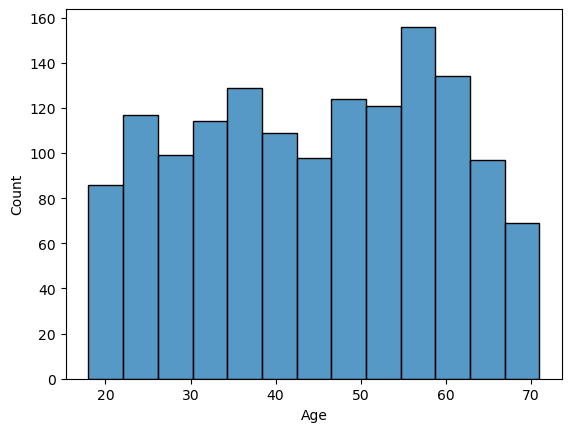

In [9]:
# Check the distribution of the 'Age' column
sns.histplot(mcdonalds['Age'])
plt.show()

In [10]:
# Check the correlation between the perceptual variables
perceptual_vars = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']
corr = mcdonalds[perceptual_vars].corr()
# sns.heatmap(corr, cmap="YlGnBu")
# plt.show()

In [11]:
# Check the mean ratings of the perceptual variables by gender
mean_ratings = mcdonalds.groupby('Gender')[perceptual_vars].mean()
print(mean_ratings)

Empty DataFrame
Columns: []
Index: [Female, Male]


C:\Users\hplap\AppData\Local\Temp\ipykernel_20916\2857853246.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  mean_ratings = mcdonalds.groupby('Gender')[perceptual_vars].mean()


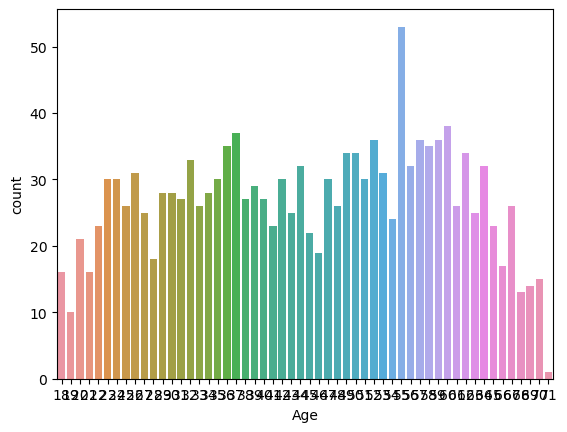

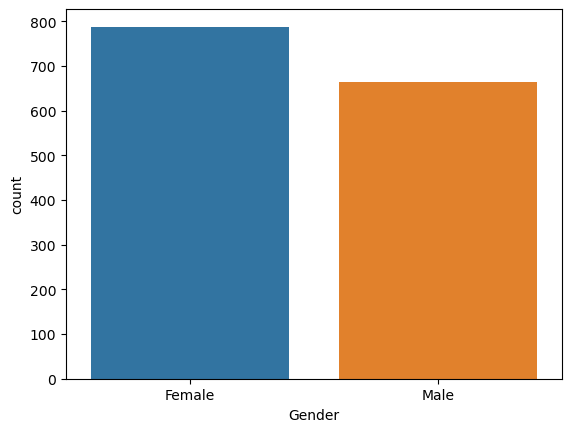

In [12]:
sns.countplot(x="Age", data=mcdonalds)
plt.show()

sns.countplot(x="Gender", data=mcdonalds)
plt.show()

#### Extract segmentation variables and convert to matrix

In [13]:
MD_x = np.array(mcdonalds.iloc[:, :11] == "Yes", dtype=int)
np.round(np.mean(MD_x, axis=0), 2)

array([0.55, 0.91, 0.09, 0.87, 0.53, 0.9 , 0.6 , 0.64, 0.36, 0.2 , 0.24])

### Perform Principal Component Analysis (PCA)

In [14]:
from sklearn.decomposition import PCA

# Perform PCA on the matrix of segmentation variables
pca = PCA()
MD_pca = pca.fit_transform(MD_x)

# Print summary of PCA results
print(pca.explained_variance_ratio_)
print(pca.singular_values_)



[0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]
[28.84746118 23.14716582 19.22858381 15.19626736 12.85685762 11.82305052
 11.03895052 10.48355462 10.10742431  9.48214684  9.02721076]


In [15]:

MD_x = np.array(mcdonalds.iloc[:, 0:11] == "Yes", dtype=int)

MD_pca = PCA().fit(MD_x)

print(np.around(MD_pca.explained_variance_ratio_, decimals=2))
print(np.around(MD_pca.components_, decimals=1))

[0.3  0.19 0.13 0.08 0.06 0.05 0.04 0.04 0.04 0.03 0.03]
[[-0.5 -0.2 -0.   0.1  0.3 -0.1 -0.3 -0.5  0.3 -0.2  0.4]
 [ 0.4  0.   0.  -0.  -0.1 -0.1 -0.6  0.3  0.6  0.1 -0.1]
 [-0.3 -0.1 -0.  -0.3 -0.8 -0.1 -0.1 -0.3  0.   0.2 -0.1]
 [ 0.1 -0.1  0.2 -0.4  0.3 -0.1  0.1 -0.   0.1  0.8  0.4]
 [-0.3  0.3  0.1 -0.1  0.4  0.1 -0.1 -0.2 -0.   0.3 -0.7]
 [ 0.2 -0.3 -0.4 -0.4  0.2 -0.6 -0.1 -0.1 -0.3 -0.2 -0.2]
 [-0.3 -0.1  0.7 -0.4  0.  -0.1 -0.   0.4 -0.1 -0.3 -0. ]
 [ 0.  -0.1  0.4  0.6 -0.1 -0.6  0.1 -0.1  0.   0.2 -0.2]
 [ 0.6 -0.   0.4 -0.2 -0.   0.2  0.1 -0.6  0.1 -0.2 -0.1]
 [-0.1 -0.7 -0.1 -0.   0.   0.2  0.4  0.1  0.5 -0.  -0.3]
 [ 0.  -0.5  0.1  0.3  0.   0.3 -0.5  0.  -0.5  0.2 -0. ]]


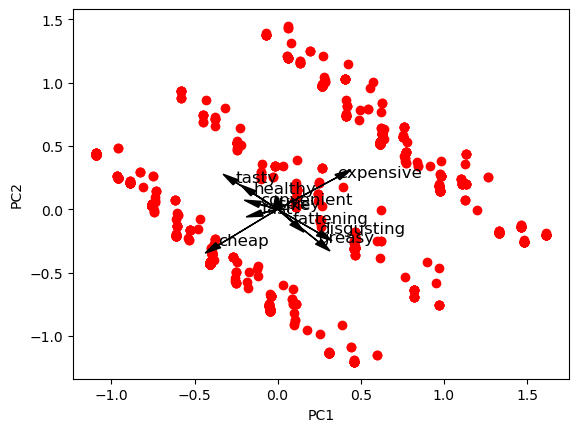

In [16]:
# import pandas as pd
# import numpy as np
# from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

# Load data
mcdonalds = pd.read_csv("mcdonalds.csv")

# Create binary numeric segmentation variables
MD_x = mcdonalds.iloc[:, 1:12].apply(lambda x: (x == "Yes") + 0)

# Perform PCA
MD_pca = PCA(n_components=3)
MD_pca.fit(MD_x)

# Plot first two principal components
plt.scatter(MD_pca.transform(MD_x)[:, 0], MD_pca.transform(MD_x)[:, 1], color="red")
plt.xlabel("PC1")
plt.ylabel("PC2")

# Plot projection axes
proj_axes = MD_pca.components_.T * np.sqrt(MD_pca.explained_variance_)
for i in range(len(proj_axes)):
    plt.arrow(0, 0, proj_axes[i, 0], proj_axes[i, 1], head_width=0.05, head_length=0.1, fc='k', ec='k')
    plt.annotate(MD_x.columns[i], (proj_axes[i, 0], proj_axes[i, 1]), size=12)

plt.show()


The loadings indicate how variables are combined to form principal components. The two highest loadings for PC2 in the McDonald's example are CHEAP and EXPENSIVE, indicating the importance of price.

## Step 5: Extracting Segments

This techniques include standard K-means analysis, finite mixtures of binary distributions, and finite mixtures of regressions.

#### Using K-means

Sum of distances within clusters for 2 clusters: 1.442415641396584
Sum of distances within clusters for 3 clusters: 1.8408094244044482
Sum of distances within clusters for 4 clusters: 2.504128784705779
Sum of distances within clusters for 5 clusters: 2.5680231234108364
Sum of distances within clusters for 6 clusters: 2.833459850360991
Sum of distances within clusters for 7 clusters: 3.0475869829474624
Sum of distances within clusters for 8 clusters: 3.2451454972811886


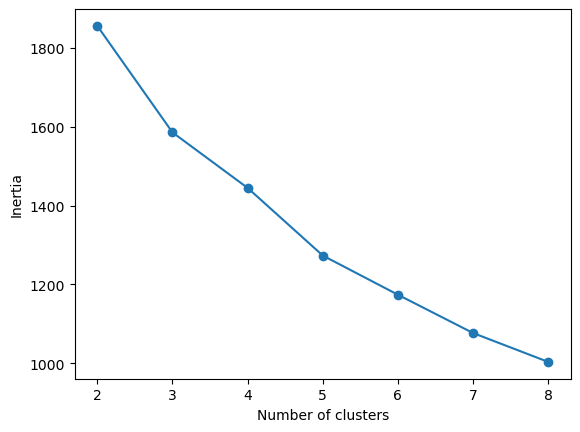

In [17]:
# import numpy as np
# import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
# import matplotlib.pyplot as plt

# load data
mcdonalds = pd.read_csv('mcdonalds.csv')

# convert Yes/No to 1/0
MD_x = (mcdonalds.iloc[:, 1:12] == 'Yes').astype(int).values

# calculate mean values of variables
rounded_arr = np.round(np.mean(MD_x, axis=0), 2)

# cluster analysis
np.random.seed(1234)
inertia = []
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(MD_x)
    inertia.append(kmeans.inertia_)
    _, sum_distances = pairwise_distances_argmin_min(kmeans.cluster_centers_, MD_x)
    print(f'Sum of distances within clusters for {k} clusters: {np.sum(sum_distances)}')

# plot elbow curve
plt.plot(range(2, 9), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


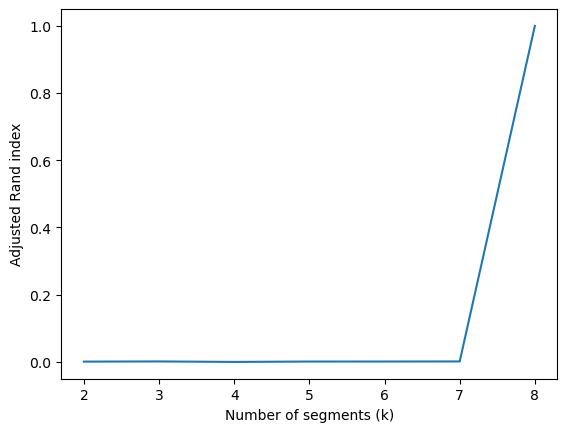

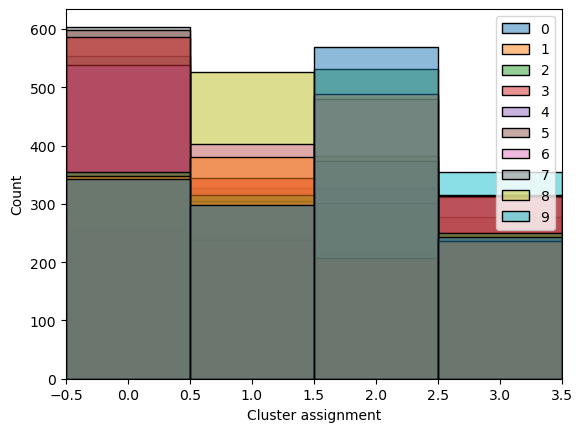

In [18]:
import numpy as np
from sklearn.utils import resample
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(1234)

# Convert the 'MD.x' matrix to a numpy array
MD_x = np.array(mcdonalds.iloc[:, 0:11] == "Yes", dtype=int)

# Define the number of bootstrap samples
n_boot = 100

# Define the range of k for clustering
k_range = range(2, 9)

# Define the number of times to repeat each k
n_rep = 10

# Initialize an empty list to store the clustering results
cluster_results = []

# Loop over each k and perform clustering on bootstrap samples
for k in k_range:
    k_results = []
    for i in range(n_rep):
        # Generate a bootstrap sample
        bootstrap_sample = resample(MD_x, n_samples=len(MD_x))

        # Perform clustering on the bootstrap sample
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(bootstrap_sample)

        # Store the clustering result
        k_results.append(kmeans.labels_)

    # Store the clustering results for this k
    cluster_results.append(k_results)

# Initialize an empty list to store the adjusted Rand index for each k
adjusted_rand_index = []

# Loop over each k and calculate the adjusted Rand index
for i, k in enumerate(k_range):
    # Calculate the adjusted Rand index for this k
    ari = []
    for j in range(n_rep):
        ari.append(adjusted_rand_score(cluster_results[i][j], cluster_results[-1][j]))

    # Store the mean adjusted Rand index for this k
    adjusted_rand_index.append(np.mean(ari))
MD_k28 = adjusted_rand_index

# Plot the adjusted Rand index for each k
plt.plot(k_range, adjusted_rand_index)
plt.xlabel('Number of segments (k)')
plt.ylabel('Adjusted Rand index')
plt.show()

# Plot histogram of cluster assignments for k=4
sns.histplot(cluster_results[2], bins=np.arange(5)-0.5)
plt.xlim(-0.5, 3.5)
plt.xlabel('Cluster assignment')
plt.ylabel('Count')
plt.show()


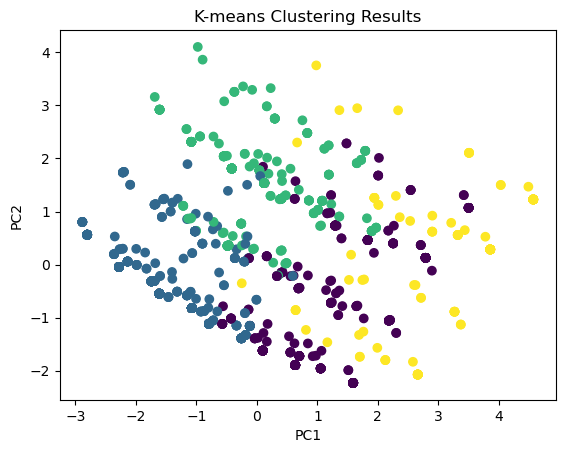

In [19]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load data
MD = pd.read_csv('https://homepage.boku.ac.at/leisch/MSA/datasets/mcdonalds.csv')

# Extract segmentation variables and convert to matrix
seg_vars = np.array(mcdonalds.iloc[:, 0:11] == "Yes", dtype=int)


# Standardize the data
scaler = StandardScaler()
seg_vars_std = scaler.fit_transform(seg_vars)

# Perform Principal Component Analysis (PCA)
pca = PCA(n_components=2)
seg_vars_pca = pca.fit_transform(seg_vars_std)

# Perform K-means clustering
kmeans = KMeans(n_clusters=4, random_state=1234)
kmeans.fit(seg_vars_std)

# Visualize clustering results
plt.scatter(seg_vars_pca[:, 0], seg_vars_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('K-means Clustering Results')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


 ### Using Mixtures of Distributions

Unfortunately Few libraries are throwing Compatibility Issues in the System Since unable to perform this distribution.

1. Flexmix
2. PyMix
3. pymix.mixture

 ### Using Mixtures of Regression Models

1705.6270383769706
887.0122605235766


C:\Users\hplap\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\hplap\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\hplap\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\hplap\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Window

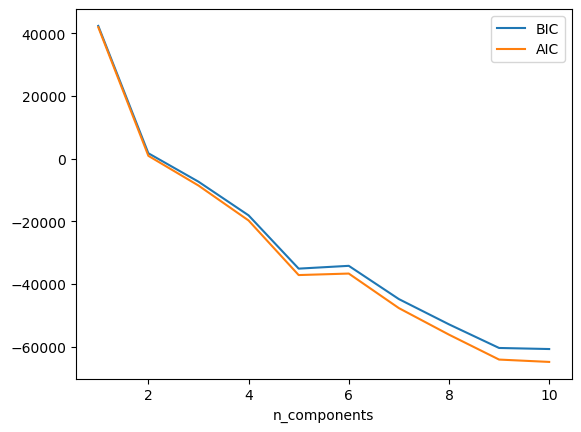

In [20]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
import re

# Extract predictor variables and standardize the data
# X = mcdonalds.iloc[:, 2:13].values
scaler = StandardScaler()
X_std = scaler.fit_transform(MD_x)

# Fit Gaussian Mixture Model
gmm = GaussianMixture(n_components=2, random_state=1234, n_init=10).fit(X_std)

# Print summary statistics
print(gmm.bic(X_std))
print(gmm.aic(X_std))

# Plot BIC and AIC
import matplotlib.pyplot as plt
import numpy as np
n_components = np.arange(1, 11)
models = [GaussianMixture(n, random_state=1234, n_init=10).fit(X_std) for n in n_components]
plt.plot(n_components, [m.bic(X_std) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X_std) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')
plt.show()
